In [2]:
import pandas as pd
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 10

from sklearn import *
import seaborn as sns

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("/data/snsdata.csv")
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
gradyear        30000 non-null int64
gender          27276 non-null object
age             24914 non-null float64
friends         30000 non-null int64
basketball      30000 non-null int64
football        30000 non-null int64
soccer          30000 non-null int64
softball        30000 non-null int64
volleyball      30000 non-null int64
swimming        30000 non-null int64
cheerleading    30000 non-null int64
baseball        30000 non-null int64
tennis          30000 non-null int64
sports          30000 non-null int64
cute            30000 non-null int64
sex             30000 non-null int64
sexy            30000 non-null int64
hot             30000 non-null int64
kissed          30000 non-null int64
dance           30000 non-null int64
band            30000 non-null int64
marching        30000 non-null int64
music           30000 non-null int64
rock            30000 non-null int64


In [47]:
features = ['basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs']

In [6]:
df.gradyear.value_counts()

2009    7500
2008    7500
2007    7500
2006    7500
Name: gradyear, dtype: int64

In [5]:
k = 5

1. Find inertia score
2. Number of members in each cluster
3. Find the distances between each points and its closest centroid
4. Find the threshold based on 99% distance to find outliers
5. In each cluster, calculate avg for each feature value and see if any patterns emerge. For example one cluster is leaned toward sports lover or shoppers.

In [57]:
X = df[features]
X.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [58]:
X.isnull().sum()

basketball     0
football       0
soccer         0
softball       0
volleyball     0
              ..
abercrombie    0
die            0
death          0
drunk          0
drugs          0
Length: 36, dtype: int64

In [59]:
scaler = preprocessing.StandardScaler()
X_std = scaler.fit_transform(X)

In [22]:
kmeans = cluster.KMeans(n_clusters=k, random_state=1)
df["cluster"] = kmeans.fit_predict(X_std) 

In [23]:
df["cluster"].value_counts()

1    22131
3     5917
4     1128
0      823
2        1
Name: cluster, dtype: int64

In [85]:
np.zeros([4])

array([0., 0., 0., 0.])

In [30]:
distances = np.zeros([len(df)])
for i in range(k):
    X_std_cluster = X_std[df.cluster == i]
    centroid = kmeans.cluster_centers_[i].reshape(1, -1)
    distances[df.cluster == i] = metrics.pairwise_distances(X_std_cluster
                                        , centroid).flatten()
df["distance"] = distances
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster,distance
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.293950
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,3,10.408968
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3.291727
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.960785
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,4,8.617440


In [60]:
df.groupby("cluster").distance.agg(["mean", "median", "count"])

,mean,median,count
cluster,,,
0,6.169213,5.016554,823
1,3.210752,2.900202,22131
2,0.000000,0.000000,1
3,7.920838,7.066733,5917
4,10.685939,9.149060,1128


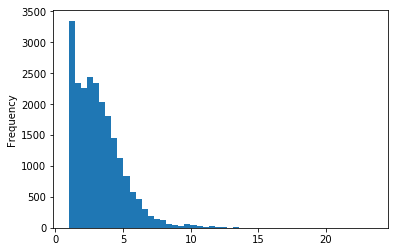

In [87]:
df[df.cluster == 1].distance.plot.hist(bins = 50)

In [88]:
np.percentile([4, 5, 9, 10, 0, 9, 4, 7], 99)

9.93

In [42]:
distanace_threshold = [None] * k
for i in range(k):
    distances = df[df.cluster == i].distance.values
    distanace_threshold[i] = np.percentile(distances, 99)
    
distanace_threshold

[22.072411412589318,
 9.298391799038402,
 0.0,
 20.7020941922339,
 33.96355646476707]

In [61]:
df["anomaly"] = df.apply(lambda row: row.distance 
            > distanace_threshold[row.cluster], axis = 1)
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster,distance,anomaly
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.293950,False
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,3,10.408968,False
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3.291727,False
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.960785,False
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,4,8.617440,False


In [37]:
df.anomaly.value_counts()

False    29697
True       303
Name: anomaly, dtype: int64

In [40]:
df.pivot_table(values="age", index="cluster", 
            columns="anomaly", aggfunc="count")

anomaly,False,True
cluster,,
0,709.0,6.0
1,17969.0,188.0
2,1.0,NaN
3,5027.0,49.0
4,953.0,12.0


In [52]:
df[df.cluster == 0][features].mean().sort_values(ascending = False)[:10]

band        4.069259
marching    1.352369
music       1.230863
god         0.589307
dance       0.481166
hair        0.380316
rock        0.374241
shopping    0.306197
church      0.296476
cute        0.292831
dtype: float64

In [53]:
df[df.cluster == 1][features].mean().sort_values(ascending = False)[:10]

music         0.565993
god           0.324387
dance         0.251548
hair          0.201301
shopping      0.187746
cute          0.177263
rock          0.162984
band          0.155664
basketball    0.152456
football      0.152004
dtype: float64

In [89]:
df[df.cluster == 2]

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster,distance,anomaly,cluster_pca
14187,2007,F,18.119,44,0,2,0,0,0,1,0,0,0,0,1,22,1,0,0,1,1,0,0,1,10,0,1,0,12,2,327,0,0,1,0,0,6,6,6,0,2,0.0,False,4


In [54]:
df[df.cluster == 2][features].mean().sort_values(ascending = False)[:10]

blonde      327.0
sex          22.0
hair         12.0
god          10.0
death         6.0
die           6.0
drunk         6.0
football      2.0
dress         2.0
sexy          1.0
dtype: float64

In [55]:
df[df.cluster == 3][features].mean().sort_values(ascending = False)[:10]

music         1.027886
dance         0.957242
shopping      0.935778
god           0.870881
cute          0.796688
hair          0.716241
mall          0.660470
church        0.652358
basketball    0.652020
football      0.572080
dtype: float64

In [56]:
df[df.cluster == 4][features].mean().sort_values(ascending = False)[:10]

hair      3.243794
sex       2.398936
music     2.228723
kissed    1.571809
die       1.203014
rock      1.100177
god       1.003546
dance     0.999113
drugs     0.949468
drunk     0.781028
dtype: float64

In [62]:
pca = decomposition.PCA()
X_pca = pca.fit_transform(X_std)

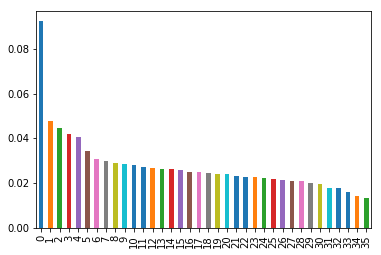

In [64]:
pd.Series(pca.explained_variance_ratio_).plot.bar()

In [68]:
variance_retention = pd.Series(np.cumsum(pca.explained_variance_ratio_))
variance_retention[variance_retention< 0.99]

0     0.092391
1     0.139977
2     0.184785
3     0.226565
4     0.267137
        ...   
30    0.920358
31    0.938430
32    0.956112
33    0.972089
34    0.986498
Length: 35, dtype: float64

In [78]:
pca = decomposition.PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

kmeans = cluster.KMeans(n_clusters=k)
df["cluster_pca"] = kmeans.fit_predict(X_pca) 

In [79]:
df.cluster_pca.value_counts()

1    22078
0     3750
3     3064
2      604
4      504
Name: cluster_pca, dtype: int64

In [80]:
df[df.cluster_pca == 0][features].mean().sort_values(ascending = False)[:10]

shopping      1.138933
dance         0.893067
music         0.880800
cute          0.846933
mall          0.815467
hair          0.754667
basketball    0.749600
football      0.647467
soccer        0.515200
god           0.514933
dtype: float64

In [81]:
df[df.cluster_pca == 1][features].mean().sort_values(ascending = False)[:10]

music         0.531434
god           0.303560
dance         0.275568
shopping      0.215101
cute          0.192545
basketball    0.172072
football      0.166636
soccer        0.166501
hair          0.164508
band          0.158438
dtype: float64

In [82]:
df[df.cluster_pca == 2][features].mean().sort_values(ascending = False)[:10]

god           4.483444
church        2.182119
jesus         2.028146
music         1.069536
bible         0.728477
band          0.471854
dance         0.448675
hair          0.428808
basketball    0.387417
shopping      0.387417
dtype: float64

In [83]:
df[df.cluster_pca == 3][features].mean().sort_values(ascending = False)[:10]

music     1.546345
band      1.247063
hair      1.216384
dance     0.748042
sex       0.733681
rock      0.659269
god       0.659269
die       0.617493
cute      0.499674
kissed    0.416123
dtype: float64

In [84]:
df[df.cluster_pca == 4][features].mean().sort_values(ascending = False)[:10]

hair      4.422619
sex       3.545635
music     3.402778
kissed    2.007937
rock      1.759921
band      1.597222
dance     1.505952
die       1.482143
blonde    1.396825
god       1.186508
dtype: float64